In this problem, you try out the Central Limit Theorem for a case where the conditions under which it was derived apply, and a case under which the conditions do not apply.

a) In this exercise, try out the CLT on the exponential distribution. First, derive what parameters of a Gauss distribution you would expect from the mean of $n$ samples taken from the exponential distribution with 

$p(x) = \lambda\textrm{e}^{-\lambda x}$.

Then, try out the CLT for at least 3 different choices of $n$ and $\lambda$ and discuss the results. To generate random numbers according to the expentintal distribution, you can use 

$x = -\dfrac{\ln(U)}{\lambda}$

where $U$ is a uniformly distributed random number between [0,1). 

b) Now try out the CLT for the Cauchy distribution:

$f(x) = \dfrac{1}{\pi\gamma}\dfrac{\gamma^2}{(x-x_0)^2+\gamma^2}$

Argue why the CLT is not expected to hold for the Cauchy distribution. You can generate random nombers from the Cauchy distribution by setting

$x = \gamma\tan(\pi U-\pi/2)+x_0$.

Try $x_0=25$ and $\gamma=3$ and plot the distribution for x. Now take $n=100$ samples and plot the distribution of the mean. Discuss the results. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [2]:
def exp_dist(x, l):
    return l*np.exp(-l*x)

In [3]:
x = np.arange(0.,20,0.1);

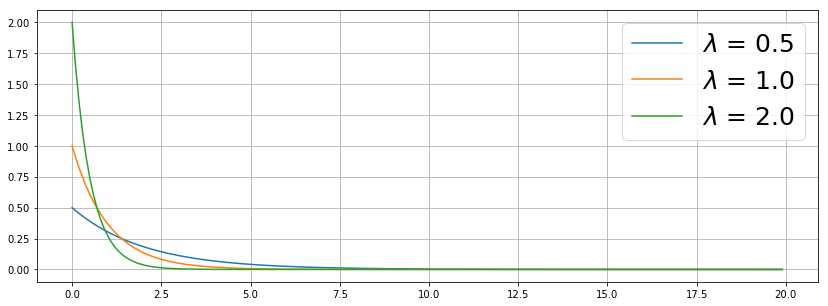

In [4]:
y_05= exp_dist(x, 0.5)
y_1 = exp_dist(x, 1.)
y_2 = exp_dist(x, 2.)
plt.figure(figsize=(14,5))
plt.plot(x,y_05, label=r"$\lambda$ = 0.5")
plt.plot(x,y_1, label=r"$\lambda$ = 1.0")
plt.plot(x,y_2, label=r"$\lambda$ = 2.0")
plt.grid()
plt.legend(fontsize=25)
plt.show()

In [162]:
def gauss(x, mean, sigma):
    a =  1./(np.sqrt(2*np.pi)*sigma)
    b = np.exp(-0.5*np.power(x-mean,2)/(np.power(sigma,2)))
    return a*b

In [163]:
def calc_mean(xdata, ydata):
    stepsize = xdata[1]-xdata[0]
    mean = 0.
    area = 0.
    for i in range(1,len(xdata)):
        mean += (xdata[i]-0.5*stepsize)*ydata[i]  # use midpoints of interval
        area += abs(ydata[i])
    return mean/area

def calc_std(xdata, ydata, mean):
    stepsize = xdata[1]-xdata[0]
    std = 0.
    area = 0.
    for i in range(0,len(xdata)):
        std += (xdata[i]-0.5*stepsize-mean)**2*ydata[i]
        area += abs(ydata[i])
    return np.sqrt(std/area)

In [164]:
def rand(lam):
    return -np.log(random.random())/lam

In [165]:
n = 3000
lam = 0.01
means = []
temp = []
for i_n in range(0,n):
    temp.append(rand(lam))


SyntaxError: invalid syntax (<ipython-input-165-8760e998b7d3>, line 7)

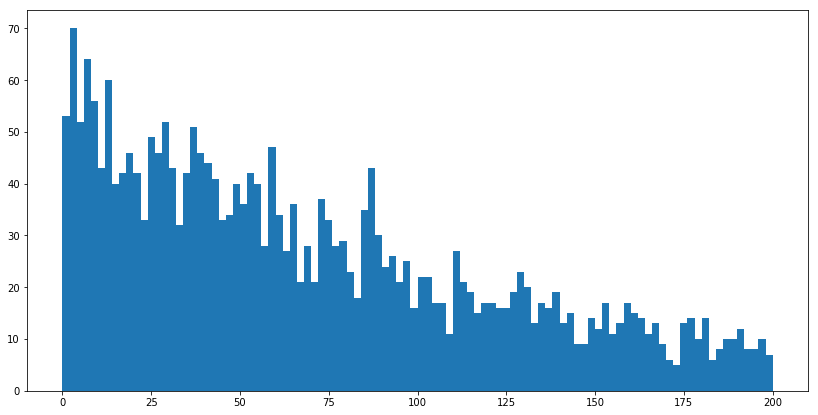

In [166]:
plt.figure(figsize=(14,7))
weights, bins, patches = plt.hist(means, bins=100, range=(0.,200.))
plt.show()
stepsize = 200./len(weights)
midpoints = np.linspace(0.5*stepsize,200.-0.5*stepsize,len(weights))

In [167]:
calculated_mean =  calc_mean(midpoints, weights)
print("calculated mean  = %.3f" % calculated_mean)
calculated_sigma = calc_std(midpoints, weights, calculated_mean)
print("calculated sigma = %.3f" % calculated_sigma)

calculated mean  = 69.898
calculated sigma = 52.480


1.5811388300841898

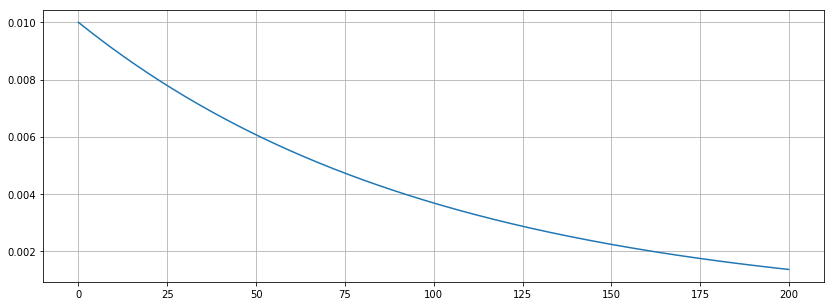

In [161]:
x = np.arange(0.,200,0.1);
lam = 0.01
y = exp_dist(x, lam)
plt.figure(figsize=(14,5))
plt.plot(x,y)
plt.grid()
plt.show()